
## The Sparks Foundation 
## GRIP - Data Science and Business Analytics 
### TASK 2 : Prediction using unsupervised ML
Author : Pratik Punjaram Thombre

Dataset used: Iris dataset, present in sklearn library.

Dataset link: https://bit.ly/2TK5Xn5

Problem Statement :Predict the optimum number of clusters and represent it visually.



# Import required libraries

In [17]:
!pip install pandas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

Once the required libraries are imported, now we can read dataset. For that I have uploaded it on the colab itself. 

### Lets read the data form the dataset file:

In [30]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


We can check for the null values. 
The given data set have 150 rows and 6 columns. The column Labled as ID is repetative and can be droped.

In [31]:
# dropping Id column

data.drop('Id', axis=1, inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Now we are left with 5 columns.

Lets check for dublicate rows and drop them if they exist.

In [32]:
print(data.isnull().sum(), '\n\nNumber of duplicate rows: ' , data.duplicated().sum())   # check for nulls & duplicates
data.drop_duplicates(inplace=True)  
print('Remaining rows',data.shape[0]) 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows:  3
Remaining rows 147


We found 3 duplicate rows from 150 and we after we droped those duplicate rows, we are left with 147 rows. 

# KMean_Clustring

In [20]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

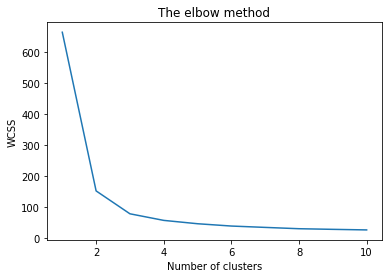

In [21]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

# Co-relational Clustring

In [ ]:
data.corr()

##Heat Map as co-relational clustring

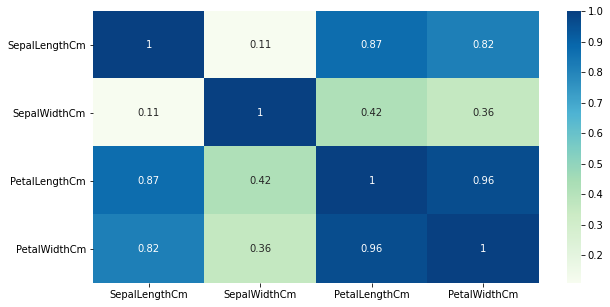

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

Here the co-relation for petal length and petal width is as high as 0.96.

## Applying kmeans to the dataset / Creating the kmeans classifier

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters - On the first two columns

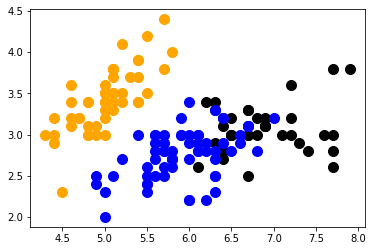

In [36]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'virginica')


# Plotting the centroids of the clusters

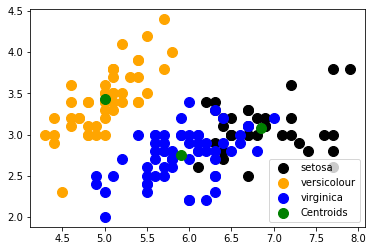

In [35]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

We have predicted the optimum number of clusters and represent it visually.

# AMIGOS THANKS FOR WATCHING.